In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("garments_worker_productivity.csv")

<IPython.core.display.Javascript object>

### Data Preprocessing and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,03-11-2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [6]:
df.sample()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2,0.8,22.52,1416.0,6840,113,0.0,0,0,57.0,1.00023


In [7]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [8]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

<IPython.core.display.Javascript object>

In [10]:
invalid_dates=df[df['date'].isna()]
invalid_dates

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
216,NaT,Quarter2,finishing,Tuesday,4,0.35,4.30,NaN,2160,0,0.0,0,0,12.0,0.952020
217,NaT,Quarter2,finishing,Tuesday,1,0.80,3.94,NaN,1440,0,0.0,0,0,2.0,0.951420
218,NaT,Quarter2,finishing,Tuesday,10,0.80,3.94,NaN,5400,0,0.0,0,0,20.0,0.912767
219,NaT,Quarter2,finishing,Tuesday,3,0.80,4.15,NaN,1620,0,0.0,0,0,9.0,0.901263
220,NaT,Quarter2,finishing,Tuesday,9,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,0.858144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,NaT,Quarter4,sewing,Saturday,4,0.50,26.66,556.0,6960,23,0.0,0,2,58.0,0.500258
981,NaT,Quarter4,finishing,Saturday,10,0.70,2.90,NaN,3360,0,0.0,0,0,8.0,0.410833
982,NaT,Quarter4,finishing,Saturday,9,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.407813
983,NaT,Quarter4,finishing,Saturday,8,0.75,4.60,NaN,3360,0,0.0,0,0,8.0,0.376597


In [11]:
print(df['date'].isna().sum())

562


In [12]:
df= df.drop(columns='date',axis=1)

In [13]:
df[df['wip'].isna()]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [14]:
df['wip']=df['wip'].fillna(df['wip'].mean())

In [15]:
df.duplicated().sum()


0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

### Basic Summary statistics of the data for the numerical variables

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1190.465991,1395.647261,7.000000,970.000000,1190.465991,1190.465991,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

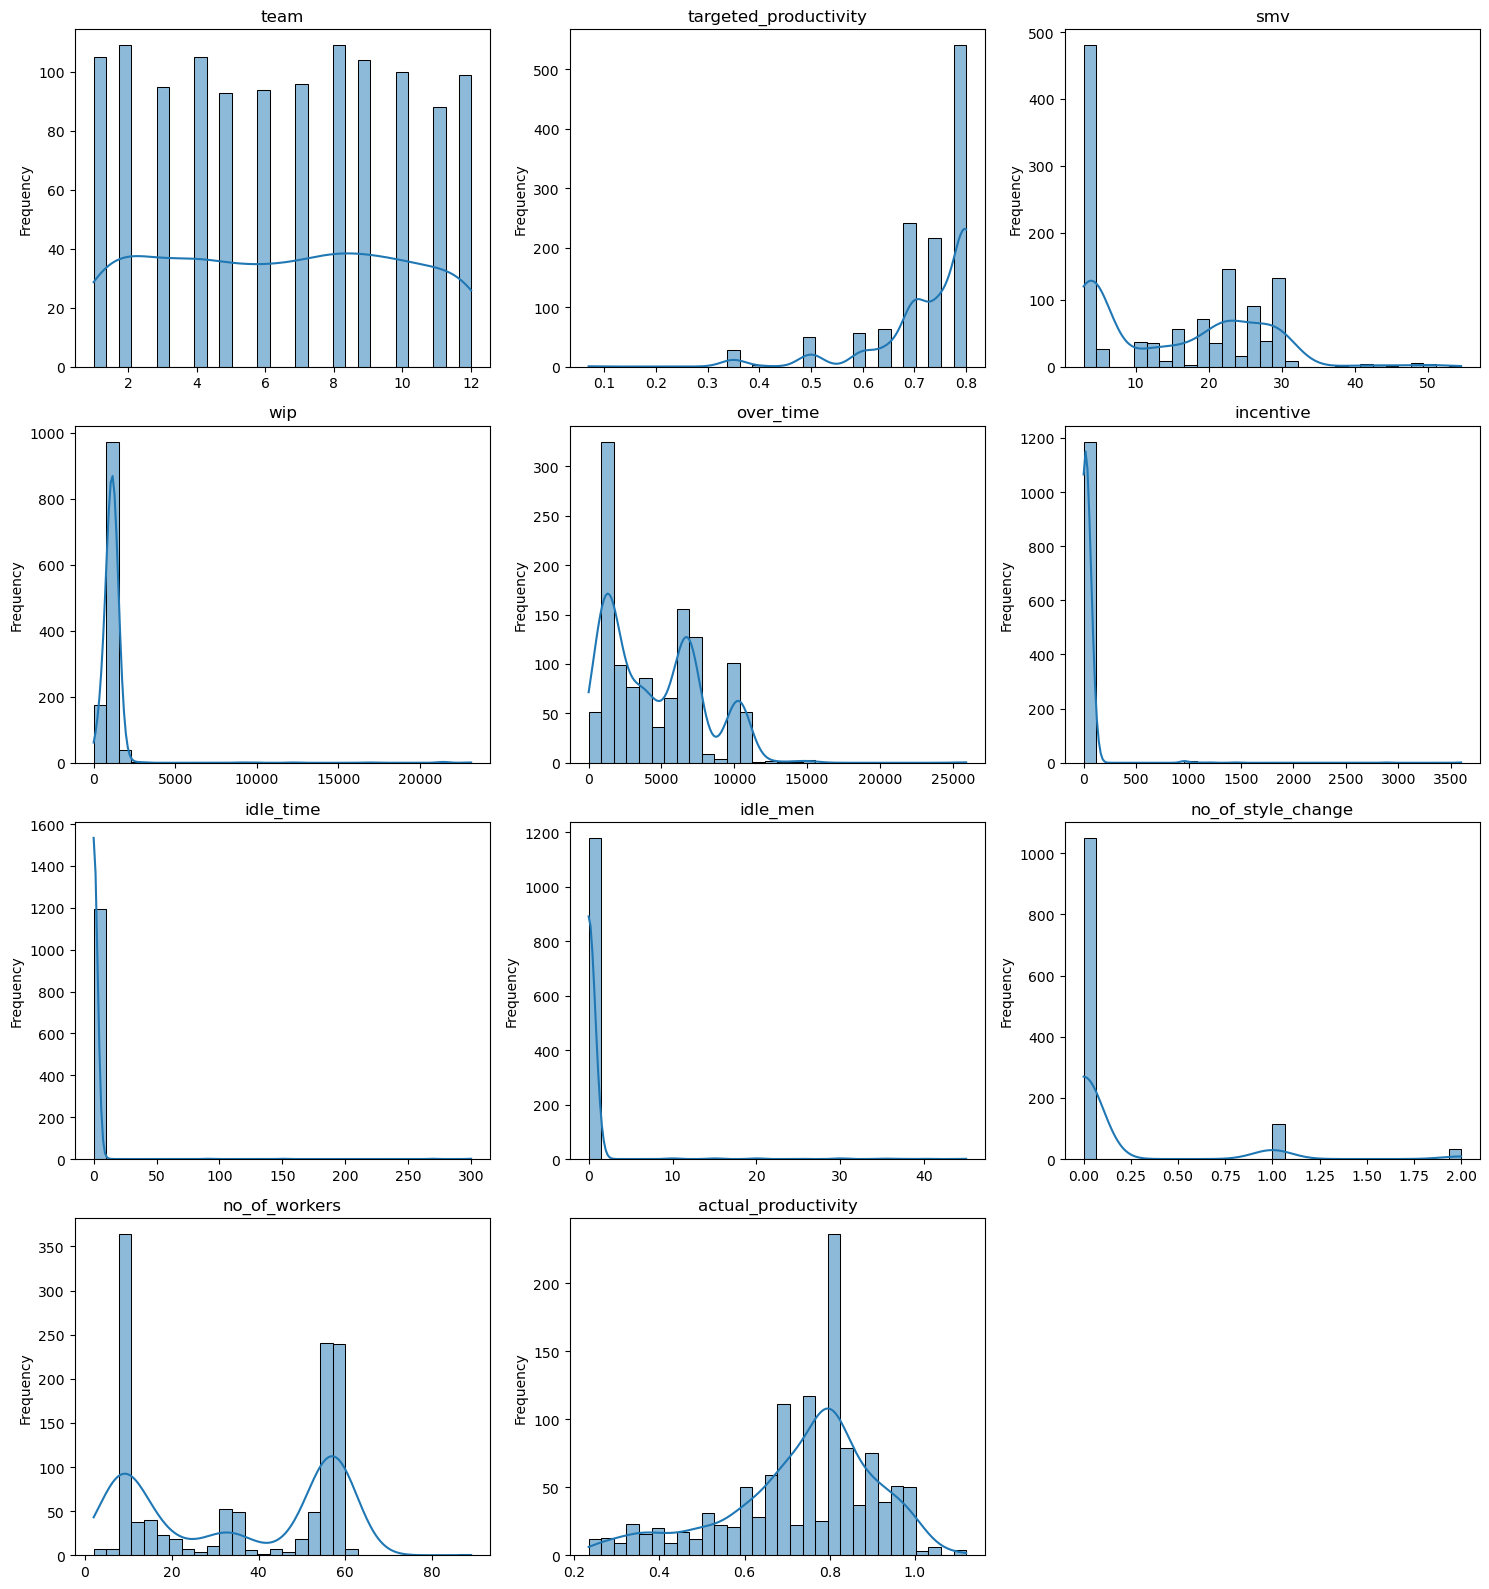

In [18]:
import math

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Setup grid layout
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Exploratory Data Analysis (EDA)

#### Total Working Days

In [19]:

print(df['day'].value_counts())
print("Sum of working days: ",df['day'].value_counts().sum())

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64
Sum of working days:  1197


In [20]:
print(df['quarter'].unique())

print("Working days per Quarter\n")

print(df.groupby('quarter')['day'].count().transpose())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Working days per Quarter

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: day, dtype: int64


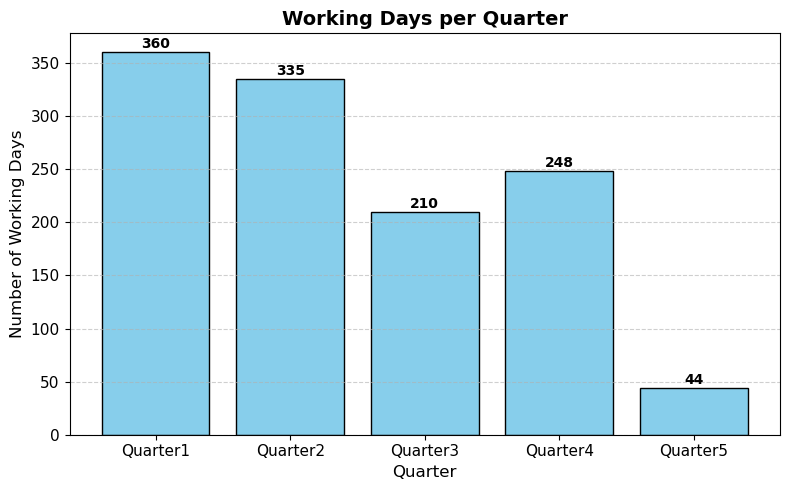

In [21]:
import matplotlib.pyplot as plt

# Group data
quarter_day_counts = df.groupby('quarter')['day'].count()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    quarter_day_counts.index, 
    quarter_day_counts.values, 
    color='skyblue', 
    edgecolor='black'
)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 1, 
        str(height), 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

# Add titles and styling
plt.title('Working Days per Quarter', fontsize=14, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Working Days', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#### Quarterly Comparison of Actual Productivity Distribution


In [22]:
actual_productivity_stats=df.groupby('quarter')['actual_productivity'].agg(['mean','std'])
actual_productivity_stats

,mean,std
quarter,,
Quarter1,0.751560,0.161318
Quarter2,0.743710,0.171114
Quarter3,0.704759,0.175614
Quarter4,0.709067,0.185983
Quarter5,0.826177,0.183851


<IPython.core.display.Javascript object>

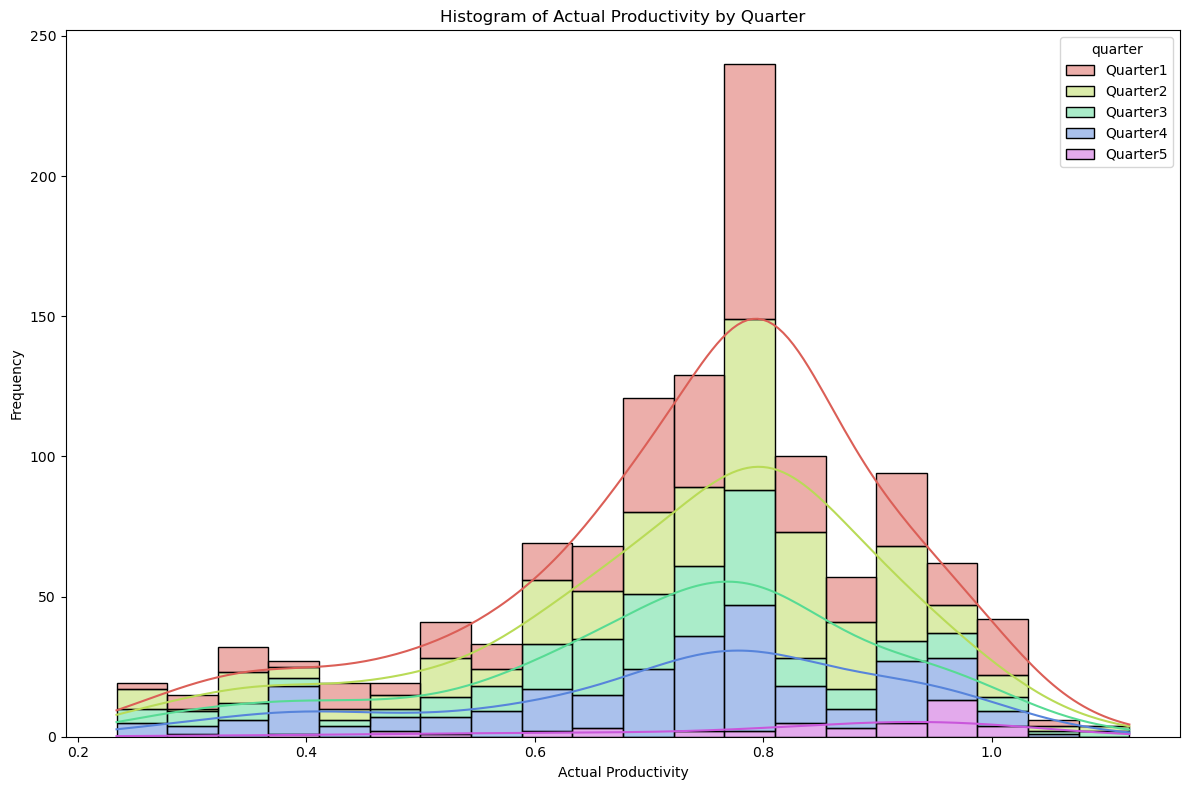

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df,
    x='actual_productivity',
    hue='quarter',
    kde=True,
    bins=20,
    multiple='stack',
    palette='hls'
)

plt.title('Histogram of Actual Productivity by Quarter')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### Department-wise Workforce Distribution: Sewing vs Finishing

In [24]:
#Count of finishing and sewing department
department_count=df.groupby('department').size()
department_count

department
finishing    506
sewing       691
dtype: int64

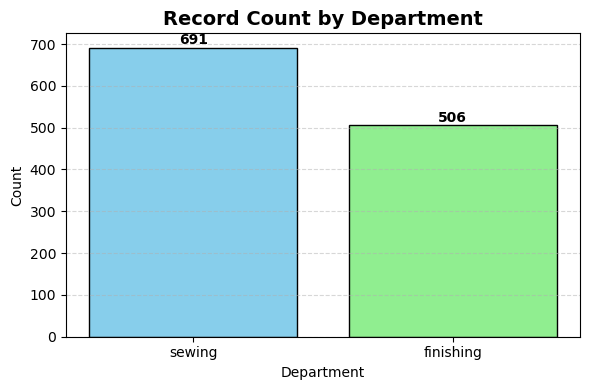

In [25]:
import matplotlib.pyplot as plt

# Get department counts (only two departments assumed)
department_count = df['department'].value_counts()

# Two custom colors
colors = ['skyblue', 'lightgreen']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(department_count.index, department_count.values, 
               color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('Record Count by Department', fontsize=14, weight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly

In [26]:
actual_productivity_by_department=df.groupby('department')['actual_productivity'].agg(['mean','std'])
actual_productivity_by_department


,mean,std
department,,
finishing,0.752951,0.197021
sewing,0.722013,0.154784


<IPython.core.display.Javascript object>

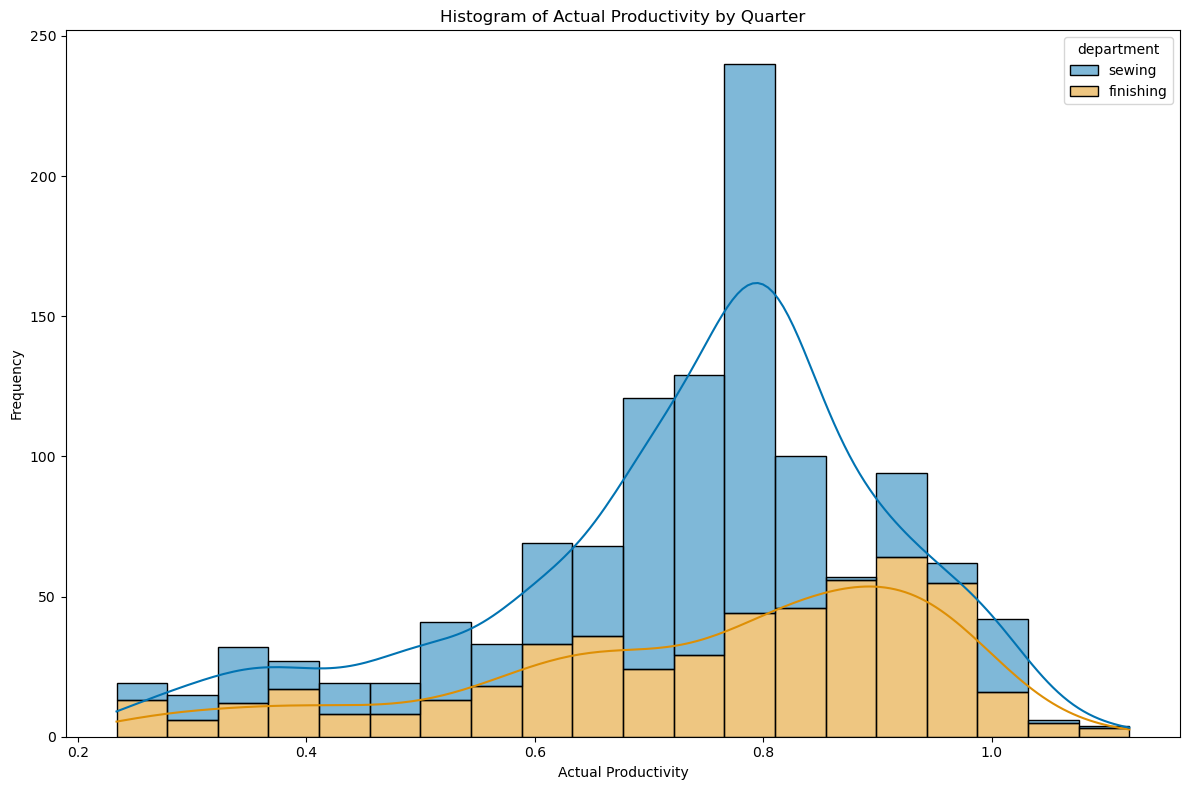

In [27]:
plt.figure(figsize=(12, 8))
filtered_df = df[df['department'].isin(['sewing', 'finishing'])]
sns.histplot(
    data=filtered_df,
    x='actual_productivity',
    hue='department',
    kde=True,
    bins=20,
    multiple='stack',
    palette='colorblind'
)

plt.title('Histogram of Actual Productivity by Quarter')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Number count for teams, smv across the year

In [28]:
team_count = df.groupby(['team']).size().reset_index(name='count')
team_count

,team,count
0,1,105
1,2,109
2,3,95
3,4,105
4,5,93
5,6,94
6,7,96
7,8,109
8,9,104
9,10,100


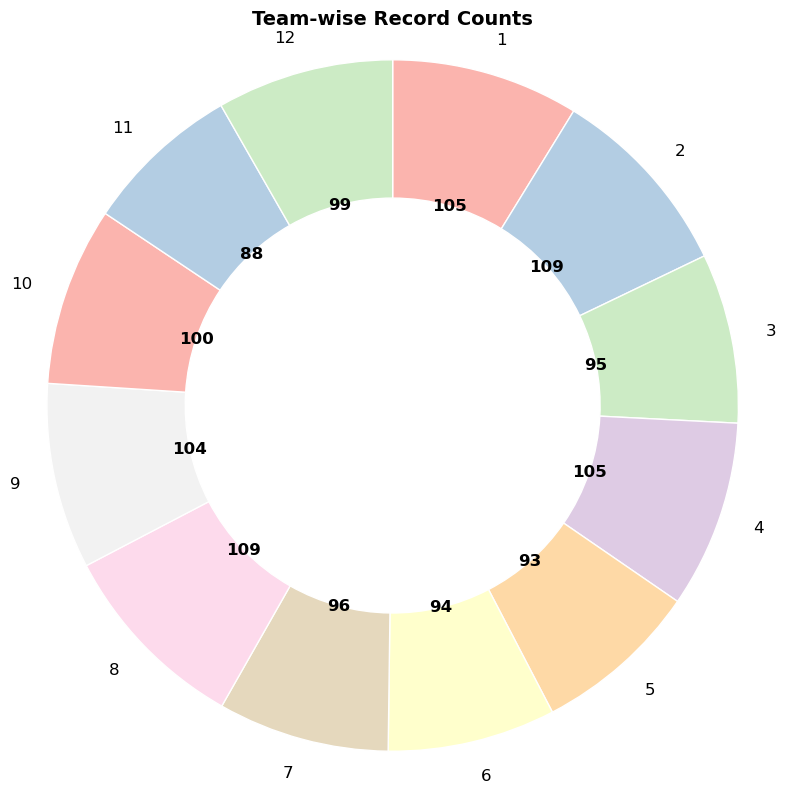

In [29]:
import matplotlib.pyplot as plt

# Data
labels = team_count['team']
sizes = team_count['count']

# Optional: colors
colors = plt.cm.Pastel1.colors

# Donut plot
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100),  # show count
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Style count labels
plt.setp(autotexts, size=12, weight="bold", color="black")

# Title and layout
plt.title('Team-wise Record Counts', fontsize=14, fontweight='bold')
plt.axis('equal')  # Keep circle shape
plt.tight_layout()
plt.show()


#### Histogram & Box plot of actual productivity based on all working days, team size, quarterts and Conclude accordingly

<IPython.core.display.Javascript object>

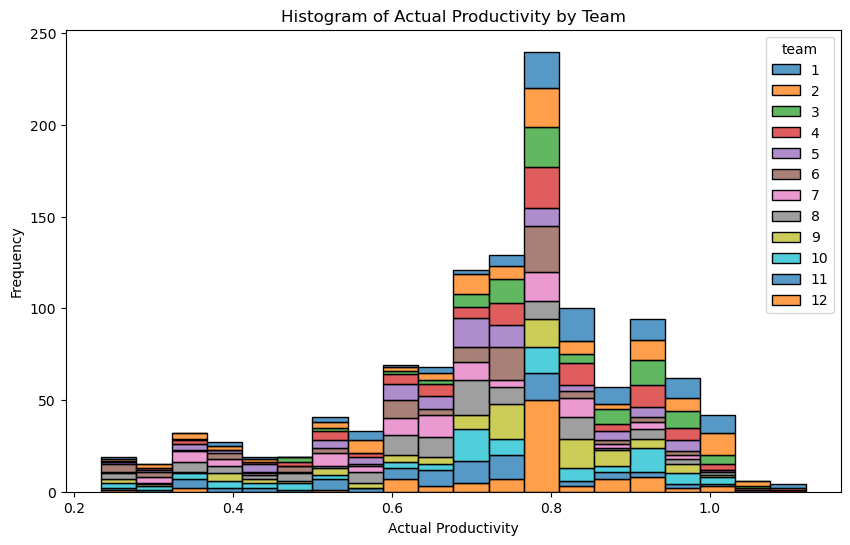

In [30]:
# Histogram of actual_productivity by team
plt.figure(figsize=(10,6))
sns.histplot(data=df, 
             x='actual_productivity', 
             hue='team', 
             multiple='stack',
             kde=False,
             bins=20,
            palette='tab10')
plt.title('Histogram of Actual Productivity by Team')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


<IPython.core.display.Javascript object>

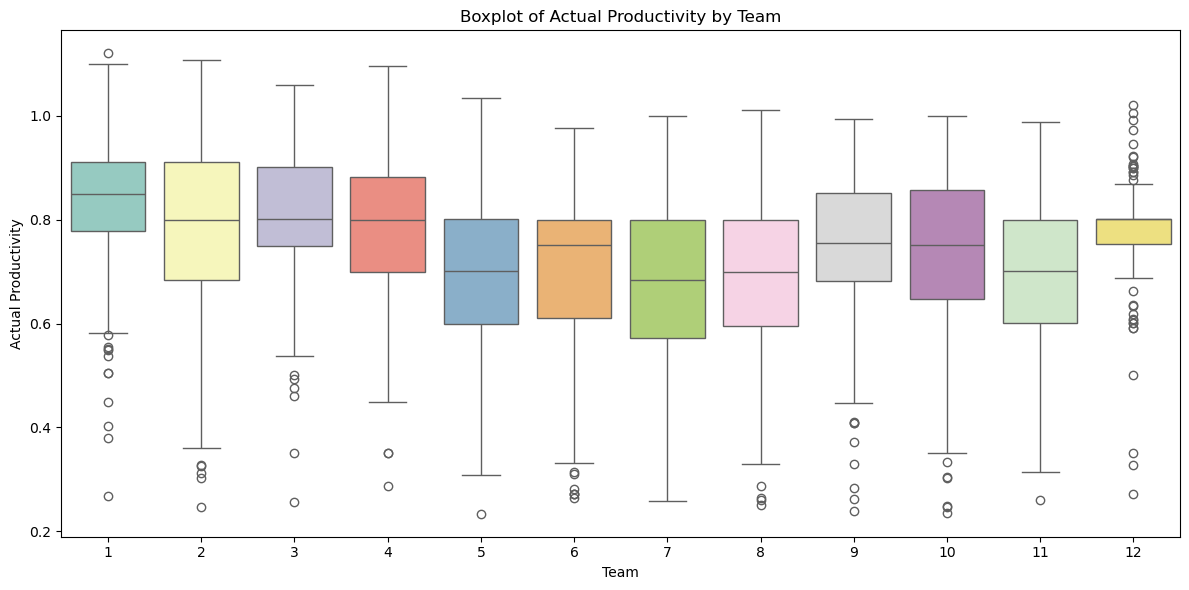

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='team',
    y='actual_productivity',
    #hue='team', 
    palette='Set3'  # You can try 'Set3', 'Paired', etc. too
)

plt.title('Boxplot of Actual Productivity by Team')
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

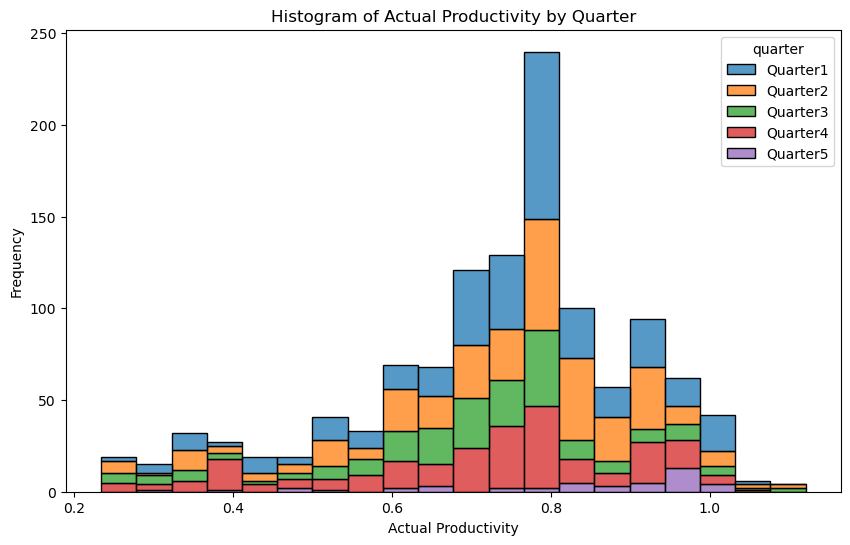

In [32]:
#Histogram of Actual Productivity by Quarter
plt.figure(figsize=(10,6))
sns.histplot(data=df, 
             x='actual_productivity', 
             hue='quarter', 
             multiple='stack', 
             bins=20,
             palette='tab10'
            )
plt.title('Histogram of Actual Productivity by Quarter')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


<IPython.core.display.Javascript object>

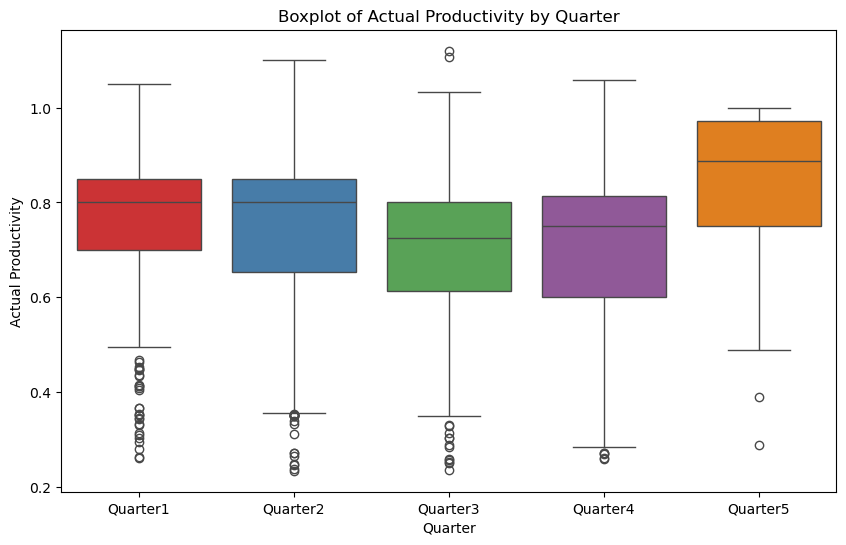

In [33]:
#Boxplot of Actual Productivity by Quarter
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='quarter', y='actual_productivity',palette='Set1')
plt.title('Boxplot of Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()


<IPython.core.display.Javascript object>

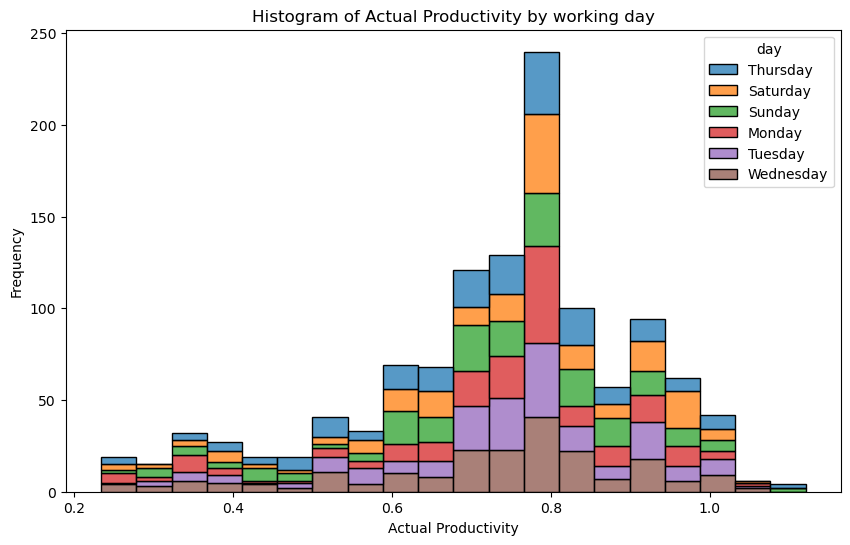

In [34]:
#Histogram of Actual Productivity by working day
plt.figure(figsize=(10,6))
sns.histplot(data=df, 
             x='actual_productivity', 
             hue='day', 
             multiple='stack', 
             bins=20,
             palette='tab10'
            )
plt.title('Histogram of Actual Productivity by working day')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>

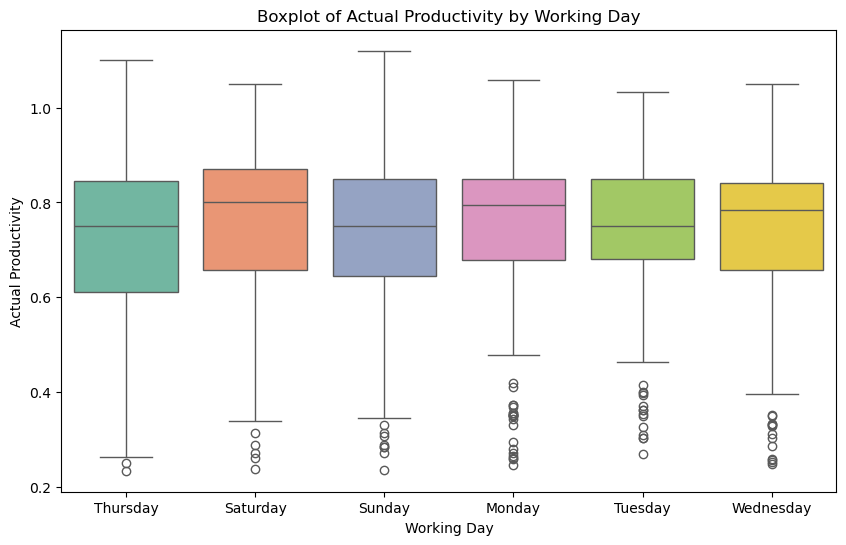

In [35]:
#Boxplot of Actual Productivity by Working Day
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day', y='actual_productivity',palette='Set2')
plt.title('Boxplot of Actual Productivity by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Actual Productivity')
plt.show()



Conclusion: Productivity Insights

Team Size:
Teams with moderate size (not too small or large) tend to show higher and more consistent productivity.
Very small or very large teams exhibit more variability and lower median productivity.

Quarter-wise:
Quarter 1 generally exhibits the highest average productivity, possibly due to fresh targets or fewer holidays.
Later quarters show slightly more variation and sometimes lower productivity, suggesting performance may taper off over time.

Working Days:
Productivity varies across the week. Certain days (e.g., Monday or Friday) may show lower median productivity, possibly due to fatigue or weekend effect.
Middle-of-the-week days tend to show higher median values, indicating better engagement.

#### Find correlation matrix and draw heat map for all variables

In [36]:
# Compute correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
corr

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.025384,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.049114,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.018322,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.025384,0.049114,-0.018322,1.000000,0.014490,0.021881,-0.026267,-0.048490,-0.069004,0.009791,0.088365
over_time,-0.096737,-0.088557,0.674887,0.014490,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.021881,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026267,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048490,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.069004,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.009791,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

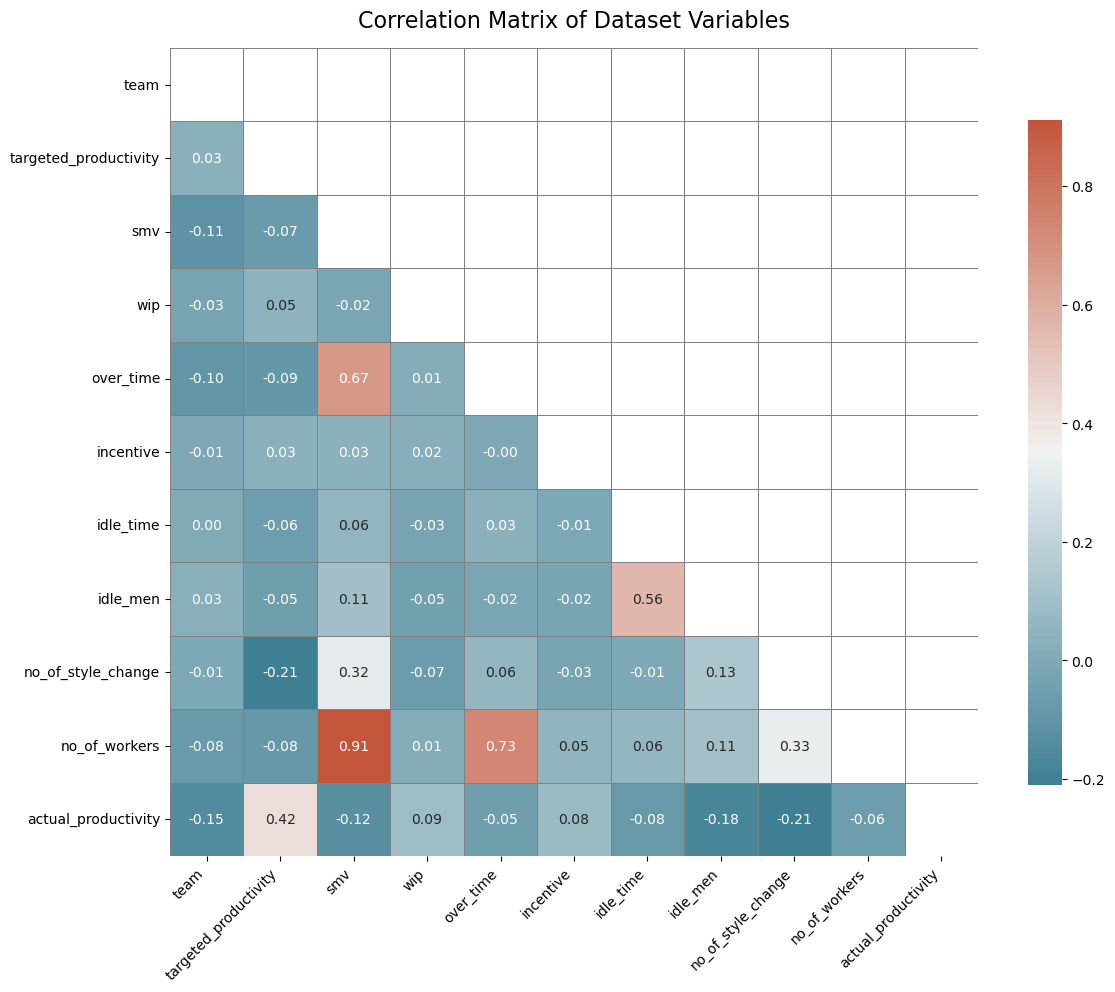

In [37]:

# Mask the upper triangle (optional, to reduce redundancy)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            linewidths=0.6, linecolor='gray', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Dataset Variables", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [38]:
print(df['targeted_productivity'].mean())
print(df['actual_productivity'].mean())

0.7296324143692565
0.7350910969791145


In [39]:
df['met_target'] = df['actual_productivity'] >= df['targeted_productivity']
met_target_rate = df['met_target'].mean()
print(f"Target Met Rate: {met_target_rate:.2%}")

Target Met Rate: 73.10%


#### Productivity V/s Incentive

In [40]:
df[['actual_productivity','incentive']].corr()

,actual_productivity,incentive
actual_productivity,1.000000,0.076538
incentive,0.076538,1.000000


#### Productivity V/s Overtime

In [41]:
df[['actual_productivity','over_time']].corr()

,actual_productivity,over_time
actual_productivity,1.000000,-0.054206
over_time,-0.054206,1.000000


#### Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude

In [42]:
# Grouping by quarter and department to calculate correlation
correlation_by_quarter_dept = df.groupby(['quarter', 'department'])[['actual_productivity', 'targeted_productivity']].corr().iloc[0::2, -1]
correlation_by_quarter_dept = correlation_by_quarter_dept.unstack().reset_index()
correlation_by_quarter_dept.columns = ['quarter', 'department', 'correlation']

correlation_by_quarter_dept


,quarter,department,correlation
0,Quarter1,finishing,0.293539
1,Quarter1,sewing,0.650845
2,Quarter2,finishing,0.050689
3,Quarter2,sewing,0.757120
4,Quarter3,finishing,0.036082
5,Quarter3,sewing,0.649407
6,Quarter4,finishing,0.045279
7,Quarter4,sewing,0.678559
8,Quarter5,finishing,-0.156381
9,Quarter5,sewing,0.849325


Sewing Department consistently shows a strong positive correlation between actual and targeted productivity across all quarters.
Finishing Department shows very weak or even negative correlations.
Quarter5 Finishing even shows a negative correlation (−0.15), implying performance drops as targets rise — possibly due to overloading or unrealistic expectations.

#### Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

### Hypothesis Testing

#### Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

In [43]:
from scipy.stats import norm

# Take a random sample of size > 30
sample = df[df['department']=='finishing']['actual_productivity'].sample(n=40, random_state=42)

# Set known population std dev
sigma = 0.1

#sample mean
x_bar=sample.mean()

#Null hypothesis mean
meu0=0.75

#z-stats
z=(x_bar-meu0)/(sigma/np.sqrt(len(sample)))

#p_value
p_value=1-norm.cdf(z)

print(f"Sample Mean = {x_bar:.4f}")
print(f"Z-Statistic = {z:.4f}")
print(f"P-value = {p_value:.4f}")

<IPython.core.display.Javascript object>

Sample Mean = 0.7637
Z-Statistic = 0.8674
P-value = 0.1929


#### Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.



In [44]:
from scipy.stats import norm

# Take a random sample of size > 30
sample = df[df['department']=='sewing']['actual_productivity'].sample(n=40, random_state=42)

# Set known population std dev
sigma = 0.1

#sample mean
x_bar=sample.mean()

#Null hypothesis mean
meu0=0.75

#z-stats
z=(x_bar-meu0)/(sigma/np.sqrt(len(sample)))

#p_value
p_value=1-norm.cdf(z)

print(f"Sample Mean = {x_bar:.4f}")
print(f"Z-Statistic = {z:.4f}")
print(f"P-value = {p_value:.4f}")

<IPython.core.display.Javascript object>

Sample Mean = 0.7174
Z-Statistic = -2.0650
P-value = 0.9805


#### Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing department. State your null and alternative hypothesis



In [45]:
from scipy.stats import ttest_ind
# Take random samples > 30
finishing_sample = df[df['department']=='finishing']['actual_productivity'].sample(n=40, random_state=42)
sewing_sample = df[df['department']=='sewing']['actual_productivity'].sample(n=40, random_state=42)

#indepedent t-test

t_stat,p_value=ttest_ind(finishing_sample,sewing_sample,equal_var=False)

print(f"t_stat = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")

t_stat = 1.2838
P-value = 0.2031


#### Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

In [46]:
from scipy.stats import ttest_ind, shapiro

# Take random samples > 30
finishing_sample1 = df[df['department']=='finishing']['incentive'].sample(n=40, random_state=42)
sewing_sample1 = df[df['department']=='sewing']['incentive'].sample(n=40, random_state=42)

# Step 2: Normality test using Shapiro-Wilk test
shapiro_fin = shapiro(finishing_sample)
shapiro_sew = shapiro(sewing_sample)

print("Shapiro-Wilk Test:")
print(f"Finishing p-value = {shapiro_fin.pvalue:.4f}")
print(f"Sewing p-value    = {shapiro_sew.pvalue:.4f}")

Shapiro-Wilk Test:
Finishing p-value = 0.0008
Sewing p-value    = 0.0077


In [47]:
#indepedent t-test

t_stat,p_value=ttest_ind(finishing_sample1,sewing_sample1,equal_var=False)

print(f"t_stat = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")

t_stat = 0.1929
P-value = 0.8480


#### The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher as greater than or equal to .75. He believes that the percentage of actual producvity in sewing departemnt for person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his hypothesis is right or not

In [48]:
sewing_df = df[df['department'] == 'sewing']


In [49]:
def classify_productivity(value):
    if value < 0.5:
        return 'low'
    elif value < 0.75:
        return 'medium'
    else:
        return 'high'

sewing_df.loc[:, 'prod_class'] = sewing_df['actual_productivity'].apply(classify_productivity)

In [50]:
observed_counts = sewing_df['prod_class'].value_counts().reindex(['low', 'medium', 'high'])
#observed_counts

In [51]:
total = observed_counts.sum()
expected_counts = [0.3 * total, 0.4 * total, 0.3 * total]
expected_counts

[207.29999999999998, 276.40000000000003, 207.29999999999998]

In [52]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-Value: {p_value:.4f}")



Chi-Square Statistic: 315.2952
P-Value: 0.0000


#### Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

In [53]:
q1 = df[df['quarter'] == 'Quarter1']['actual_productivity']
q2 = df[df['quarter'] == 'Quarter2']['actual_productivity']
q3 = df[df['quarter'] == 'Quarter3']['actual_productivity']
q4 = df[df['quarter'] == 'Quarter4']['actual_productivity']
q5 = df[df['quarter'] == 'Quarter5']['actual_productivity']

In [54]:

# Perform ANOVA
f_stat, p_value = stats.f_oneway(q1,q2,q3,q4)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")


<IPython.core.display.Javascript object>

ANOVA F-statistic: 5.274463802636486
P-value: 0.0012927759459059219


In [55]:

# Perform ANOVA
f_stat, p_value = stats.f_oneway(q1,q2,q3,q4,q5)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")



<IPython.core.display.Javascript object>

ANOVA F-statistic: 7.1117
P-value: 0.0000


<IPython.core.display.Javascript object>

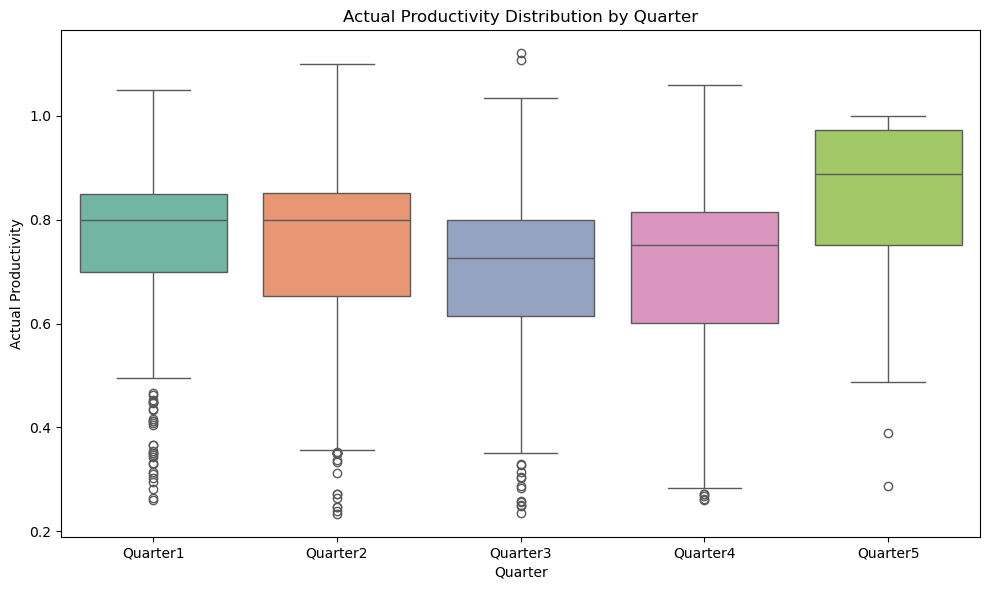

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df, palette='Set2')
plt.title("Actual Productivity Distribution by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Actual Productivity")
plt.tight_layout()
plt.show()

#### In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert to category if needed
df['day'] = df['day'].astype('category')
df['quarter'] = df['quarter'].astype('category')

In [58]:
 #Two-way ANOVA model with interaction
model = ols('actual_productivity ~ C(day) + C(quarter) + C(day):C(quarter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

D:\Software\anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
D:\Software\anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
D:\Software\anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 17
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(day),0.116280,5.0,0.773131,0.461801
C(quarter),0.342276,4.0,2.844694,0.091942
C(day):C(quarter),0.557592,20.0,0.926841,0.541534
Residual,35.223959,1171.0,NaN,NaN


<IPython.core.display.Javascript object>

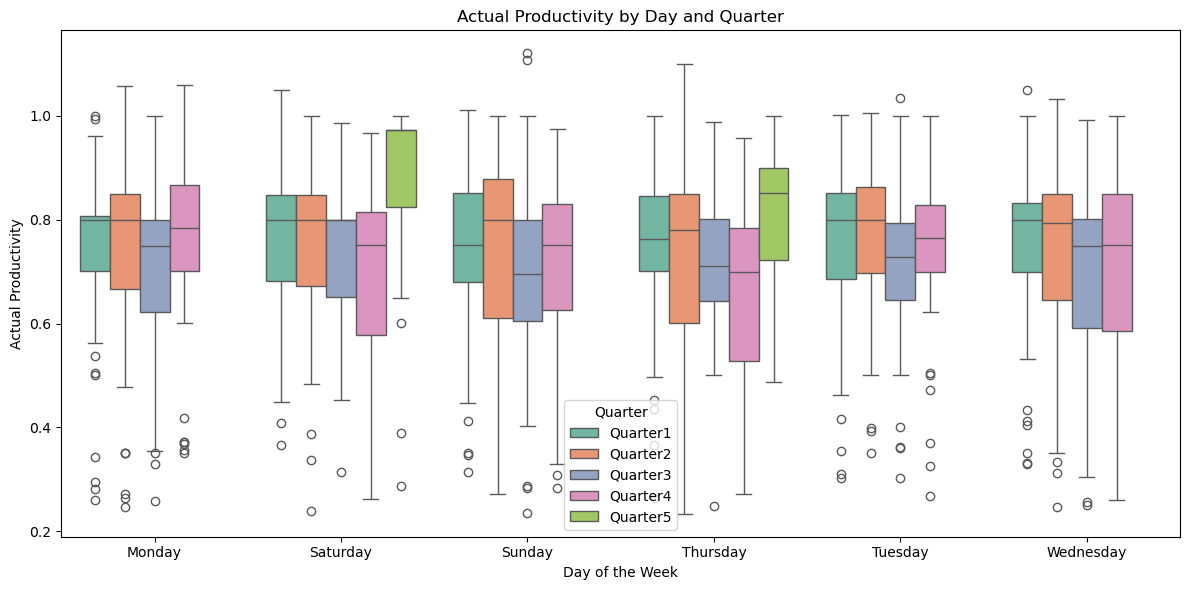

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day', y='actual_productivity', hue='quarter', palette='Set2')
plt.title('Actual Productivity by Day and Quarter')
plt.ylabel('Actual Productivity')
plt.xlabel('Day of the Week')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

##### Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

In [60]:
# Convert quarter to categorical
df['quarter'] = df['quarter'].astype(str)

# Two-way ANOVA model: actual productivity ~ quarter
model = ols('actual_productivity ~ C(quarter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Result (Quarter):")
print(anova_table)

# Drop Quarter 5 if found insignificant
df_filtered = df[df['quarter'] != 'Quarter5']

# Two-Way ANOVA model: actual productivity ~ quarter + department
model2 = ols('actual_productivity ~ C(quarter) + C(department)', data=df_filtered).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print("\nTwo-Way ANOVA Result (Quarter & Department):")
print(anova_table2)

One-Way ANOVA Result (Quarter):
               sum_sq      df         F    PR(>F)
C(quarter)   0.848747     4.0  7.111735  0.000012
Residual    35.564703  1192.0       NaN       NaN

Two-Way ANOVA Result (Quarter & Department):
                  sum_sq      df         F    PR(>F)
C(quarter)      0.462927     3.0  5.220841  0.001393
C(department)   0.180541     1.0  6.108367  0.013599
Residual       33.930706  1148.0       NaN       NaN


#### Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.